In [2]:
#import libraries

import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import Recall, Precision
import os

In [3]:
# Specify the path to the dataset directory
dataset_path = r"dataset\training_set\training_set"

# Initialize lists to store the image data and corresponding labels
images = []
labels = []

# Process the cat images
cat_path = os.path.join(dataset_path, "cats")
for image_name in os.listdir(cat_path):
    image_path = os.path.join(cat_path, image_name)
    img = load_img(image_path, target_size=(150, 150))  # Load the image and resize it
    img_array = img_to_array(img) / 255.0  # Convert the image to array and normalize pixel values
    images.append(img_array)
    labels.append(0)  # Assign label 0 to cats

# Process the dog images
dog_path = os.path.join(dataset_path, "dogs")
for image_name in os.listdir(dog_path):
    image_path = os.path.join(dog_path, image_name)
    img = load_img(image_path, target_size=(150, 150))  # Load the image and resize it
    img_array = img_to_array(img) / 255.0  # Convert the image to array and normalize pixel values
    images.append(img_array)
    labels.append(1)  # Assign label 1 to dogs

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, shuffle= True)


In [5]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # Randomly rotate the images by 20 degrees
    width_shift_range=0.1,  # Randomly shift the width by 10%
    height_shift_range=0.1,  # Randomly shift the height by 10%
    horizontal_flip=True  # Randomly flip the images horizontally
)

datagen.fit(X_train)  # Fit the data augmentation generator on the training data


In [6]:
#Create the CNN Model

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])


In [7]:
cnn = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=15, validation_data =(X_test, y_test))


Epoch 1/15
101/101 [==============================] - 180s 2s/step - loss: 0.6925 - accuracy: 0.5173 - val_loss: 0.6932 - val_accuracy: 0.4707
Epoch 2/15
101/101 [==============================] - 184s 2s/step - loss: 0.6889 - accuracy: 0.5382 - val_loss: 0.6888 - val_accuracy: 0.4919
Epoch 3/15
101/101 [==============================] - 178s 2s/step - loss: 0.6873 - accuracy: 0.5501 - val_loss: 0.6833 - val_accuracy: 0.5331
Epoch 4/15
101/101 [==============================] - 167s 2s/step - loss: 0.6823 - accuracy: 0.5642 - val_loss: 0.6751 - val_accuracy: 0.5980
Epoch 5/15
101/101 [==============================] - 163s 2s/step - loss: 0.6813 - accuracy: 0.5654 - val_loss: 0.6693 - val_accuracy: 0.6305
Epoch 6/15
101/101 [==============================] - 153s 2s/step - loss: 0.6769 - accuracy: 0.5760 - val_loss: 0.6607 - val_accuracy: 0.6167
Epoch 7/15
101/101 [==============================] - 158s 2s/step - loss: 0.6721 - accuracy: 0.5932 - val_loss: 0.6654 - val_accuracy: 0.5793

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)


26/26 [==============================] - 3s 110ms/step - loss: 0.6041 - accuracy: 0.6729
Loss: 0.6040730476379395
Accuracy: 0.6729088425636292


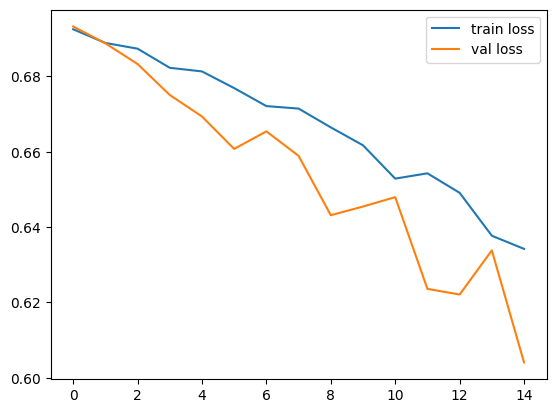

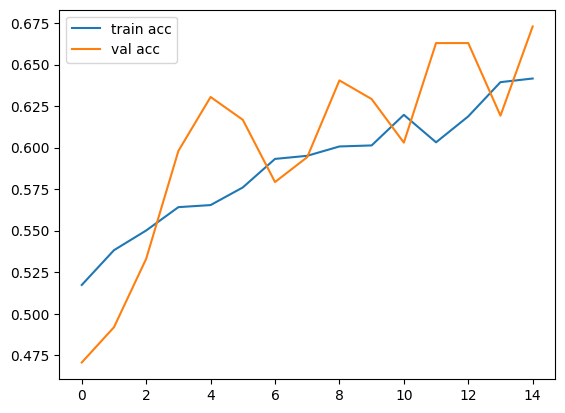

In [9]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(cnn.history['loss'], label='train loss')
plt.plot(cnn.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(cnn.history['accuracy'], label='train acc')
plt.plot(cnn.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_cnn4000 = auc(fpr_keras, tpr_keras)


26/26 [==============================] - 7s 237ms/step


In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

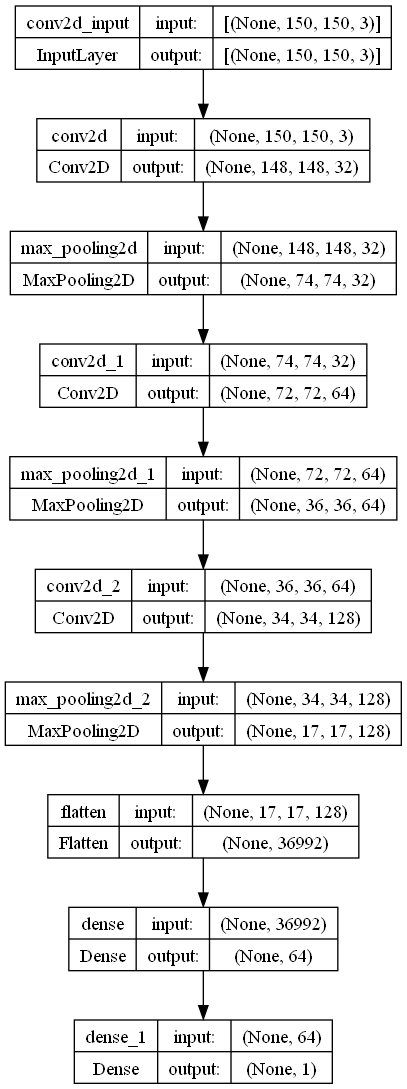

In [12]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [13]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(cm)

26/26 [==============================] - 6s 224ms/step
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[424   0]
 [377   0]]


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
